# Making a tree diagram

[NetworkX doesn't make interactive graphs by default](https://stackoverflow.com/questions/31580491/python-2-7-networkx-make-it-interactive), but things can be exported to JSON or GEXF and then visualised interactively => try with NetworkX. Could also be possible to [try Plotly](https://plotly.com/python/tree-plots/), but want to ideally avoid a new stack.

**Plot types**:

- Hierarchical options: radial, tree, etc. Hierarchical => Want something hierarchical, not force directed, as then each hierarchy level can correspond to a tracking bucket.
 - [NetworkX hierarchical ex](https://stackoverflow.com/a/29597209)
- Force directed (the classic cloud network, with node proximity determined by weights) - more pretty than functional? Could work as each node being a full tracked link, with node weights determined by parameter similarity (e.g. if mediums are equal, or some metric of similarity)
 - [NetworkX and D3 example](https://andrewmellor.co.uk/blog/articles/2014/12/14/d3-networks/) - shows how this isn't super useful? What would the point cloud tell me
 - [Use Python & Pandas to Create a D3 Force Directed Network Diagram](http://www.austintaylor.io/d3/python/pandas/2016/02/01/create-d3-chart-python-force-directed/)
 - [Example using Python](https://towardsdatascience.com/visualising-graph-data-with-python-igraph-b3cc81a495cf)
 - [How to using CoffeeScript and R](https://flowingdata.com/2012/08/02/how-to-make-an-interactive-network-visualization/)

### An approach

1. Make a hierarchical graph
2. Try and make it interactive
3. Find a way to compile [the link builder](https://britishredcrosssociety.github.io/tracked-link-builder/) into a JSON
4. Merge

### Step 1: make any hierarchical graph of any form

Based on [this SO example](https://stackoverflow.com/questions/11479624/is-there-a-way-to-guarantee-hierarchical-output-from-networkx).

Dependencies:

- [installing custom pygraphviz](https://stackoverflow.com/a/55202558) (as the [default](https://anaconda.org/anaconda/pygraphviz) isn't for Windows)
- [running 'dot -c' in anaconda prompt](https://stackoverflow.com/a/60147201)

In [2]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
from networkx.readwrite import json_graph
import pandas as pd
import matplotlib.pyplot as plt
import json

Most basic trial

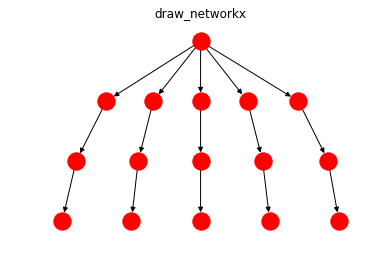

In [4]:
G = nx.DiGraph()

G.add_node("ROOT")

for i in range(5):
    G.add_node("Child_%i" % i)
    G.add_node("Grandchild_%i" % i)
    G.add_node("Greatgrandchild_%i" % i)

    G.add_edge("ROOT", "Child_%i" % i)
    G.add_edge("Child_%i" % i, "Grandchild_%i" % i)
    G.add_edge("Grandchild_%i" % i, "Greatgrandchild_%i" % i)

# write dot file to use with graphviz
# run "dot -Tpng test.dot >test.png"
write_dot(G,'test.dot')

# same layout using matplotlib with no labels
plt.title('draw_networkx')
pos =graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=False, arrows=True)
plt.savefig('nx_test.png')

### Step 2: any network graph for actual data

Map the Crossnumber connections, force-directed (cf. [other repo](https://github.com/setalyas/crossnumber))

{'A1': {'D1': 0.1, 'D2': 0.1, 'D3': 0.1, 'D4': 0.1}, 'A5': {'D6': 0.1, 'D7': 0.1}, 'A8': {}, 'A9': {'D2': 0.1}, 'A10': {'D6': 0.1}, 'A13': {}, 'A15': {'D6': 0.1, 'D7': 0.1, 'D11': 0.1, 'D12': 0.1}, 'A17': {'D6': 0.1, 'D14': 0.1}, 'A18': {'D19': 0.1}, 'A20': {'D6': 0.1}, 'A21': {'D16': 0.1}, 'A24': {'D22': 0.1}, 'A25': {'D19': 0.1}, 'A26': {'D6': 0.1}, 'A27': {'D19': 0.1, 'D23': 0.1}, 'A29': {'D19': 0.1, 'D22': 0.1, 'D29': 0.1, 'D30': 0.1, 'D31': 0.1}, 'A32': {}, 'A33': {'D19': 0.1}, 'A35': {'D35': 0.1}, 'A36': {}, 'A37': {'D31': 0.1, 'D37': 0.1}, 'A38': {'D28': 0.1, 'D34': 0.1, 'D35': 0.1, 'D37': 0.1}}
{'D1', 'A38', 'A5', 'A27', 'A9', 'D2', 'A21', 'D19', 'A26', 'D28', 'A13', 'A24', 'A25', 'D22', 'D31', 'A17', 'D4', 'D30', 'D35', 'D14', 'A20', 'A36', 'D7', 'A1', 'A10', 'A35', 'D23', 'D34', 'A15', 'A37', 'D29', 'A29', 'D3', 'D6', 'D37', 'D16', 'A18', 'A8', 'A33', 'D11', 'A32', 'D12'}
[{'source': 23, 'target': 0, 'value': 0.1}, {'source': 23, 'target': 5, 'value': 0.1}, {'source': 23, 'ta

C:\Users\swannell\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


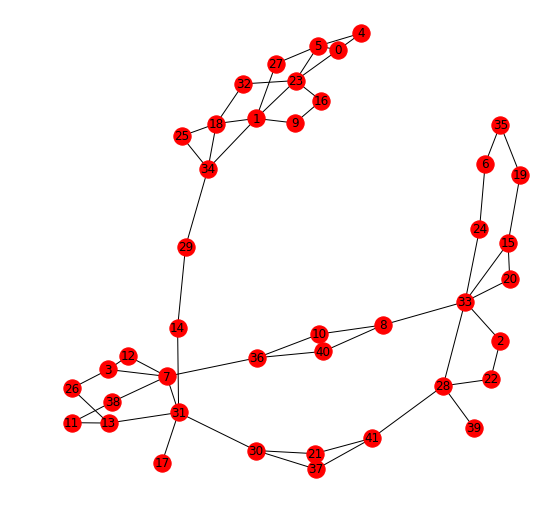

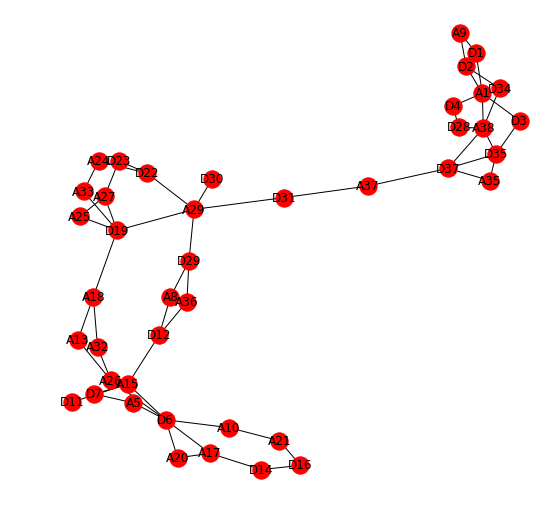

In [6]:
# Grid associations
connections = {'A1': ['D1', 'D2', 'D3', 'D4'],
               'A5': ['D6', 'D7'],
               'A8': [],
               'A9': ['D2'],
               'A10': ['D6'],
               'A13': [],
               'A15': ['D6', 'D7', 'D11', 'D12'],
               'A17': ['D6', 'D14'],
               'A18': ['D19'],
               'A20': ['D6'],
               'A21': ['D16'],
               'A24': ['D22'],
               'A25': ['D19'],
               'A26': ['D6'],
               'A27': ['D19', 'D23'],
               'A29': ['D19', 'D22', 'D29', 'D30', 'D31'],
               'A32': [],
               'A33': ['D19'],
               'A35': ['D35'],
               'A36': [],
               'A37': ['D31', 'D37'],
               'A38': ['D28', 'D34', 'D35', 'D37']
               }

for source in connections.keys():
    lst = connections[source]
    new_dict = {t: 0.1 for t in lst}
    connections[source] = new_dict

print(connections)

# Clue associations
connections['A1']['A38'] = 1
connections['A8']['D12'] = 0.5
connections['A8']['D29'] = 0.5
connections['A9']['D1'] = 1
connections['A13']['A18'] = 0.5
connections['A13']['A26'] = 0.5
connections['A17']['A20'] = 0.5
connections['A20']['D6'] = 0.5
connections['A21']['A10'] = 0.1
connections['A21']['A10'] = 0.1
connections['A24']['A33'] = 0.1
connections['A25']['D19'] = 1
connections['A27']['A25'] = 0.5
connections['A32']['A18'] = 0.5
connections['A32']['A26'] = 0.5
connections['A35']['D37'] = 1
connections['A36']['D12'] = 0.5
connections['A36']['D29'] = 0.5
connections['A36']['A8'] = 1 # same clue!
connections['A38']['A1'] = 0.5

def add_link(source, target, weight):
    if source in connections.keys():
        connections[source][target] = weight
    else:
        connections[source] = {target: weight}

add_link('D1', 'A9', 1)
add_link('D2', 'A9', 0.5)
add_link('D2', 'D1', 0.5)
add_link('D3', 'D35', 0.5)
add_link('D4', 'D28', 0.5)
add_link('D11', 'A15', 0.5)
add_link('D12', 'A15', 0.1)
add_link('D14', 'D16', 0.5)
add_link('D16', 'D14', 1)
add_link('D22', 'D23', 1)
add_link('D23', 'D22', 0.5)
add_link('D28', 'D4', 1)
add_link('D29', 'A29', 0.1)
add_link('D30', 'A29', 0.5)
add_link('D34', 'D2', 0.5)
add_link('D35', 'A35', 0.5)
add_link('D35', 'D37', 0.5)
add_link('D37', 'D35', 1)

# Make into edge/node lists

nodes = set([])
for n1, links in connections.items():
    nodes.add(n1)
    for n2 in links.keys():
        nodes.add(n2)
print(nodes)
lngth = len(nodes)
assert lngth == 42

nodes_id = [{'name': el, 'id': i} for (el, i) in zip(nodes, range(lngth))]
for i in range(lngth):
    nodes_id[i]['group'] = nodes_id[i]['name'][0]

edges_names = [{'source': source,
                'target': target,
                'value': connections[source][target]}
                for source in connections.keys()
                for target in connections[source].keys()]

edges_id = []
for el in edges_names:
    s = el['source']
    t = el['target']
    v = el['value']
    s_id = [nodes_id[i]['id'] for i in range(lngth) if nodes_id[i]['name']==s]
    t_id = [nodes_id[i]['id'] for i in range(lngth) if nodes_id[i]['name']==t]
    edges_id.append({'source': s_id[0], 'target': t_id[0], 'value': v})

print(edges_id)

json_prep = {"nodes":nodes_id, "links":edges_id}
json_dump = json.dumps(json_prep, indent=1, sort_keys=True)
print(json_dump)

fn = 'connections.json'
json_out = open(fn,'w')
json_out.write(json_dump)
json_out.close()

# Show graph

G = nx.Graph(figsize=(9, 9))

# Import id, name, and group into node of Networkx:
for i in nodes_id:
    G.add_node(i['id'], name=i['name'], group=i['group'])

# Import source, target, and value into edges of Networkx:
for i in edges_id:
    G.add_edge(i['source'], i['target'], value=i['value'])

# Visualize the network:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
nx.draw_networkx(G, ax=ax, with_labels=True)
plt.axis('off')

# Show graph

G = nx.Graph(figsize=(9, 9))

# Import id, name, and group into node of Networkx:
for i in nodes_id:
    G.add_node(i['name'])

# Import source, target, and value into edges of Networkx:
for i in edges_names:
    G.add_edge(i['source'], i['target'], value=i['value'])

# Visualize the network:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
nx.draw_networkx(G, ax=ax, with_labels=True)
plt.axis('off')
plt.savefig('connections.png')

end_nodes = [node for (node, degree) in G.degree() if degree==1]
print('The nodes at the far ends of the graph:', end_nodes)

# Make a directed graph instead, as the clues are directional?

### Step 3: any interactive graph

Basic interactive, from https://andrewmellor.co.uk/blog/articles/2014/12/14/d3-networks/

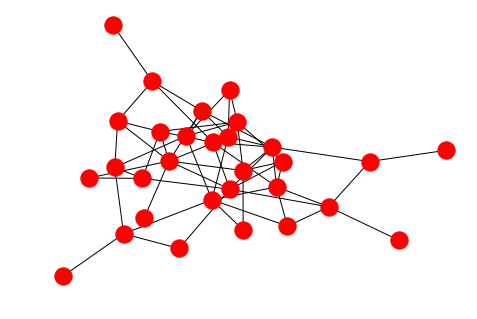

In [7]:
G = nx.erdos_renyi_graph(30,4.0/30)
while not nx.is_connected(G):
    G = nx.erdos_renyi_graph(30,4.0/30)
plt.figure(figsize=(6,4));
nx.draw(G)

In [18]:
for ix,deg in dict(G.degree()).items():
    G.node[ix]['degree'] = deg
    G.node[ix]['parity'] = (1-deg%2)

for ix,katz in nx.katz_centrality(G).items():
    G.node[ix]['katz'] = katz

list(G.nodes(data=True))[:5]

[(0, {'degree': 5, 'parity': 0, 'katz': 0.2032701223494794}),
 (1, {'degree': 4, 'parity': 1, 'katz': 0.17011137773389734}),
 (2, {'degree': 4, 'parity': 1, 'katz': 0.18691888711978186}),
 (3, {'degree': 2, 'parity': 1, 'katz': 0.14046928561788002}),
 (4, {'degree': 4, 'parity': 1, 'katz': 0.16264038314400228})]

In [20]:
data = json_graph.node_link_data(G)
with open('graph.json', 'w') as f:
    json.dump(data, f, indent=4)

This doesn't seem to make a working D3 graph either?? Maybe the issue is D3?

### Troubleshooting step 4.1: make any D3 graph work locally

[These steps](https://www.dashingd3js.com/d3js-first-steps) imply D3 is loaded locally - so it's not that.

- [Force-directed example](http://www.austintaylor.io/d3/python/pandas/2016/02/01/create-d3-chart-python-force-directed/) failed locally (ex_force_directed).
- Nabbed [jerisalem's](https://github.com/jerisalan/d3-radial-tree) radial tree -- works fine (ex_d3-radial-tree).
- Took [this auto tree](https://andrewmellor.co.uk/blog/articles/2014/12/14/d3-networks/) example - doesn't work locally (ex_andrewmellor).

Difference = the working one has the JSON loaded directly into a Javascript file as a variable, but the others are trying to take them from .json files. Could be linked to [this](https://stackoverflow.com/questions/42909810/d3-visualization-on-local-machine-without-html-server) [problem](https://stackoverflow.com/questions/18586921/how-to-launch-html-using-chrome-at-allow-file-access-from-files-mode)?

Looked into SimpleHTTPServer, but couldn't find it on Conda Forge.

THEN! Considered trying to [change the Chrome flags to accept local files](https://stackoverflow.com/questions/18586921/how-to-launch-html-using-chrome-at-allow-file-access-from-files-mode), but[ this message scared me](https://stackoverflow.com/a/33801287) -- so as instructed, tried ```python -m http.server``` from this folder, and it successfully loaded the ```index.html``` Crossnumber viz! Phew! (close it with Ctrl+C).

### Attempt 4.2: make any D3 radial graph work locally

Found a [CSV-based D3 radial graph](https://bl.ocks.org/denjn5/4cc1a43f41efdc0ae6b7a1bf6a7d5e4e). Works with the above local server.

### Attempt 4.3: make a D3 radial graph with labelled axes work locally

Found a [CSV-based D3 radial tidy tree](https://blockbuilder.org/FrissAnalytics/974dc299c5bc79cc5fd7ee9fa1b0b366) -- ideal! Also works. A good basis to draw on! The CSV structure is the full address as a dot-separated value. N.B. this version is forked from a [JSON version](https://observablehq.com/@d3/radial-tidy-tree).

## Attempt 5: make from the engagement KPIs data

In [15]:
eng = pd.read_csv('RawData\\KPI workshop write-up_Engagement - Sheet1.csv')
eng.columns = ['objective', 'driver', 'metric', 'slice', 'colour']
eng.drop('colour', axis=1, inplace=True)
eng.sample(5)

,objective,driver,metric,slice
38,Adoption,Get new users,New user # / %,"By channel (e.g. organic search, referrals)"
21,Engagement,Relevance,Time on page,NaN
30,Adoption,Cross-promotion,# volunteer sign-ups from other sources,NaN
14,Engagement,Popularity,Shares #,NaN
36,Adoption,Get new users,Users migrate from old sites,NaN


In [22]:
eng_tidy = pd.DataFrame(columns=['id', 'value'])
counter = 0
pairs = set([])
for i in eng.index:
    obj_dri_met = (eng.loc[i, 'objective'], eng.loc[i, 'driver'], eng.loc[i, 'metric'])
    obj_dri = obj_dri_met[:2]
    if obj_dri in pairs:
        continue
    else:
        pairs.add(obj_dri)
        eng_tidy.loc[counter] = ['{}.{}'.format(obj_dri[0], obj_dri[1]), 1]
        counter += 1
    if obj_dri_met in pairs:
        continue
    else:
        pairs.add(obj_dri_met)
        eng_tidy.loc[counter] = ['{}.{}.{}'.format(obj_dri_met[0], obj_dri_met[1], obj_dri_met[2]), 1]
        counter += 1
eng_tidy

,id,value
0,Happiness.Being informed / learning,1
1,Happiness.Being informed / learning.Quiz success,1
2,Happiness.Ease of use / smooth,1
3,Happiness.Ease of use / smooth.Happy path comp...,1
4,Happiness.Leave feedback,1
5,Happiness.Leave feedback.Mood clicks (happy face),1
6,Happiness.Recommendation,1
7,Happiness.Recommendation.Survey responses / NPS,1
8,Happiness.Delight,1
9,Happiness.Delight.Sentiment,1


In [14]:
eng_tidy = pd.DataFrame(columns=['id', 'value'])
eng_tidy.loc[0] = ['one', 'two']
eng_tidy

,id,value
0,one,two
